In [7]:
import ROOT, random, glob, os
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import DataSetInfo as ds
import waveLibs as wl
# ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;") # suppress ROOT messages
homePath = os.path.expanduser('~')

noiseRate 3.0
trapENFCal>1&&trapENFCal<100
Noisy Runs and rates: [ 22328.  22428.  22461.  22462.  22493.  22494.  23705.  23706.  23707.
  23708.  23709.  23710.  23711.  23712.  23713.  23714.  23715.  23718.
  23719.  23721.  23725.  23726.  23728.  23729.  23730.  23731.  23732.
  23733.  23734.  23735.  23737.  23738.  23739.  23740.  23741.  23742.
  23743.  23744.  23745.  23746.  23747.  23748.  23749.  23750.  23751.
  23752.  23753.  23754.  23755.  23756.  23757.  23758.  23759.] [ 202.  231.  232.  197.  173.  307.  266.  346.  398.  367.  404.  366.
  388.  417.  361.  411.  351.  372.  313.  398.  182.  186.  186.  163.
  167.  156.  171.  184.  206.  171.  160.  182.  167.  189.  192.  161.
  192.  195.  183.  217.  168.  179.  179.  173.  192.  184.  185.  464.
  163.  170.  157.  181.  197.]
Run:  22328.0
Noisy channels: [ 1124.] [ 195.]
Run:  22428.0
Noisy channels: [ 1124.] [ 222.]
Run:  22461.0
Noisy channels: [ 1124.] [ 225.]
Run:  22462.0
Noisy channels: [ 1124.] 

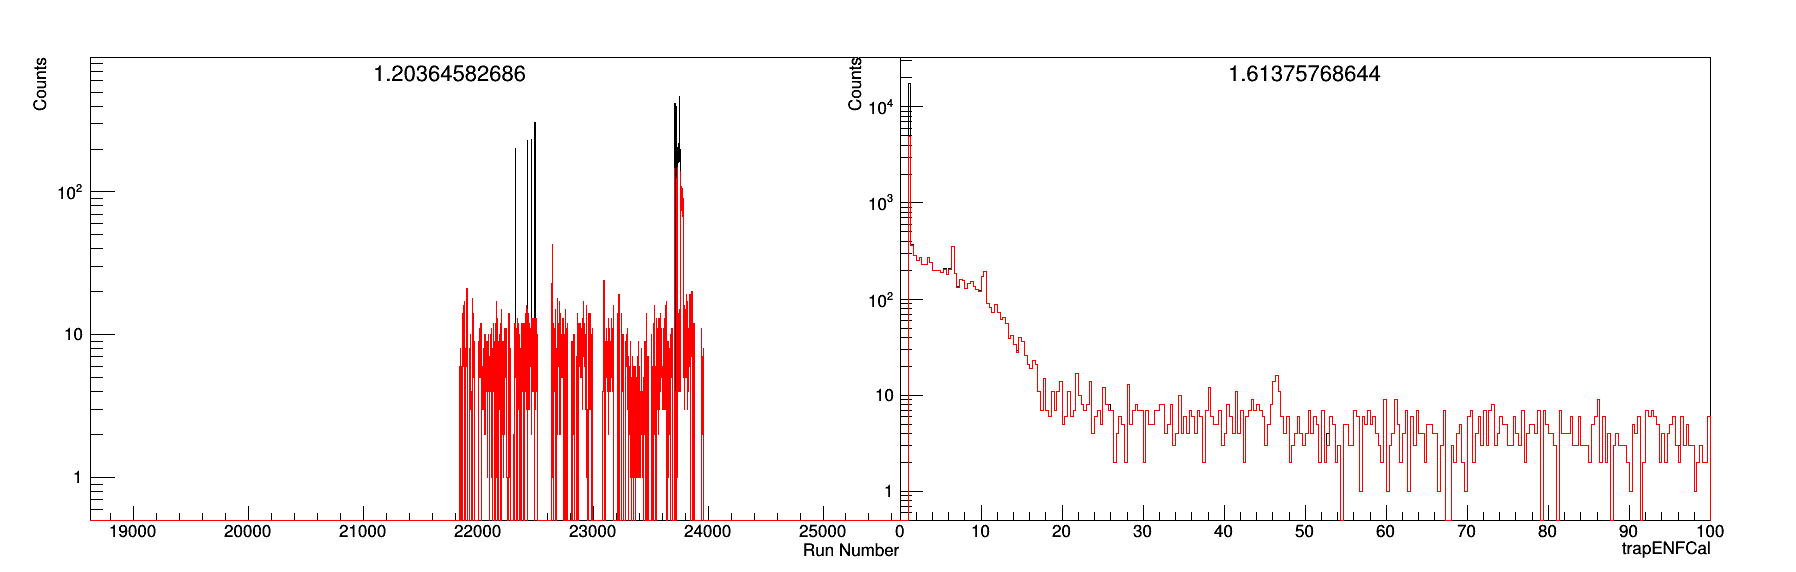

In [20]:
dsNum = 5
ROOT.gStyle.SetOptStat(0)

chList = ds.GetGoodChanList(dsNum)
nChans = len(chList)
avgRate = 100
noiseRate = float(10*(nChans-2)/avgRate)
print "noiseRate", noiseRate
noiseRate = 3.0

bkg = ROOT.TChain("skimTree")
# bkg.Add("~/project/latskim/latSkimDS%d*.root"%dsNum)
for ch in chList:
    if ch == 614: continue
    bkg.Add("~/project/latskim/latSkimDS%d_ch%d*.root"%(dsNum, ch))

theCut = "trapENFCal>1&&trapENFCal<100"
# theCut += "&& run!=22428  && run!=22461  && run!=22494"
# theCut += "&& channel!=614 && channel!=1298 && channel!=1124 && channel!=1302 && channel!=1330 && channel!=1332"
# theCut += "&& channel != 1208"
# theCut += "&& channel!=598 && channel!=614 && channel != 1106 && channel != 1124 && channel!=1298  &&channel!=1302  && channel!=1330  && channel!=1332"

print theCut
c = ROOT.TCanvas("c","c",1800,600)
c.Divide(2,1,0)

c.cd(1)
ROOT.gPad.SetLogy(1)
rlo, rhi = ds.dsRanges[dsNum][0], ds.dsRanges[dsNum][1]

h1 = wl.H1D(bkg,rhi-rlo,rlo,rhi,"run",theCut,"Run Number","Counts")
h1.SetLineColor(ROOT.kBlack)
h1.Draw()

runs,rates = wl.npTH1D(h1, "i")
idx = np.where(rates > 150)
print "Noisy Runs and rates:", runs[idx], rates[idx]

c.cd(2)
ROOT.gPad.SetLogy(1)
h4 = wl.H1D(bkg,300,0,100,"trapENFCal",theCut,"trapENFCal","Counts")
h4.SetLineColor(ROOT.kBlack)
h4.Draw()

badRunDict = {}

hList = []
totalCut = ""
for i, run in enumerate(runs[idx]):
    hList.append(ROOT.TH1D)
    hList[i] = wl.H1D(bkg,785,550,1335,"channel",theCut+"&& run == %d"%run,"channel","Counts")
    chans,rates = wl.npTH1D(hList[i], "i")
    idx2 = np.where(rates > noiseRate)
    print "Run: ", run
    print "Noisy channels:", chans[idx2], rates[idx2]
    ChStr = ""
    NoiseCut = ""
    for ch in chans[idx2]:
        ChStr += "channel==%d||"%ch
    # When combining the channel string, remove the last 2 characters
    NoiseCut += "&&!(run==%d&&(%s))"%(run, ChStr[:-2])
    
#     print NoiseCut
    totalCut += NoiseCut
    
# print totalCut
theCut += totalCut
print theCut

h5 = wl.H1D(bkg,300,0,100,"trapENFCal",theCut,"trapENFCal","Counts")
h5.SetLineColor(ROOT.kRed)
h5.Draw("same")

c.cd(1)
ROOT.gPad.SetLogy(1)
h7 = wl.H1D(bkg,rhi-rlo,rlo,rhi,"run",theCut,"Run Number","Counts")
h7.SetLineColor(ROOT.kRed)
h7.Draw("same")

# chans,rates = wl.npTH1D(h7, "i")
# idx = np.where(rates > 1000)
# print "Noisy channels:", chans[idx], rates[idx]

c.Draw()

noiseRate 3.0
trapENFCal>1&&trapENFCal<100
Noisy Runs and rates: [ 10663.  10745.  11175.  12735.  12745.  12746.  12765.  12766.  12767.
  13004.] [  38.   17.   37.   12.   13.   22.   42.  161.   13.   34.]
Run:  10663.0
Noisy channels: [ 578.  610.  692.] [ 36.   1.   1.]
Run:  10745.0
Noisy channels: [ 578.  664.  692.] [ 14.   2.   1.]
Run:  11175.0
Noisy channels: [ 578.] [ 37.]
Run:  12735.0
Noisy channels: [ 580.  598.  600.  664.  672.  692.] [ 1.  1.  5.  3.  1.  1.]
Run:  12745.0
Noisy channels: [ 580.  582.  664.  692.] [  1.   1.   1.  10.]
Run:  12746.0
Noisy channels: [ 692.] [ 22.]
Run:  12765.0
Noisy channels: [ 608.  692.] [  1.  41.]
Run:  12766.0
Noisy channels: [ 598.  600.  648.  690.  692.] [   1.    2.    1.    1.  156.]
Run:  12767.0
Noisy channels: [ 600.  692.] [  1.  12.]
Run:  13004.0
Noisy channels: [ 580.  598.  600.  640.  648.  664.  672.] [  1.   8.  18.   1.   1.   1.   4.]
trapENFCal>1&&trapENFCal<100&&!(run==10663&&(channel==578||channel==610||chan

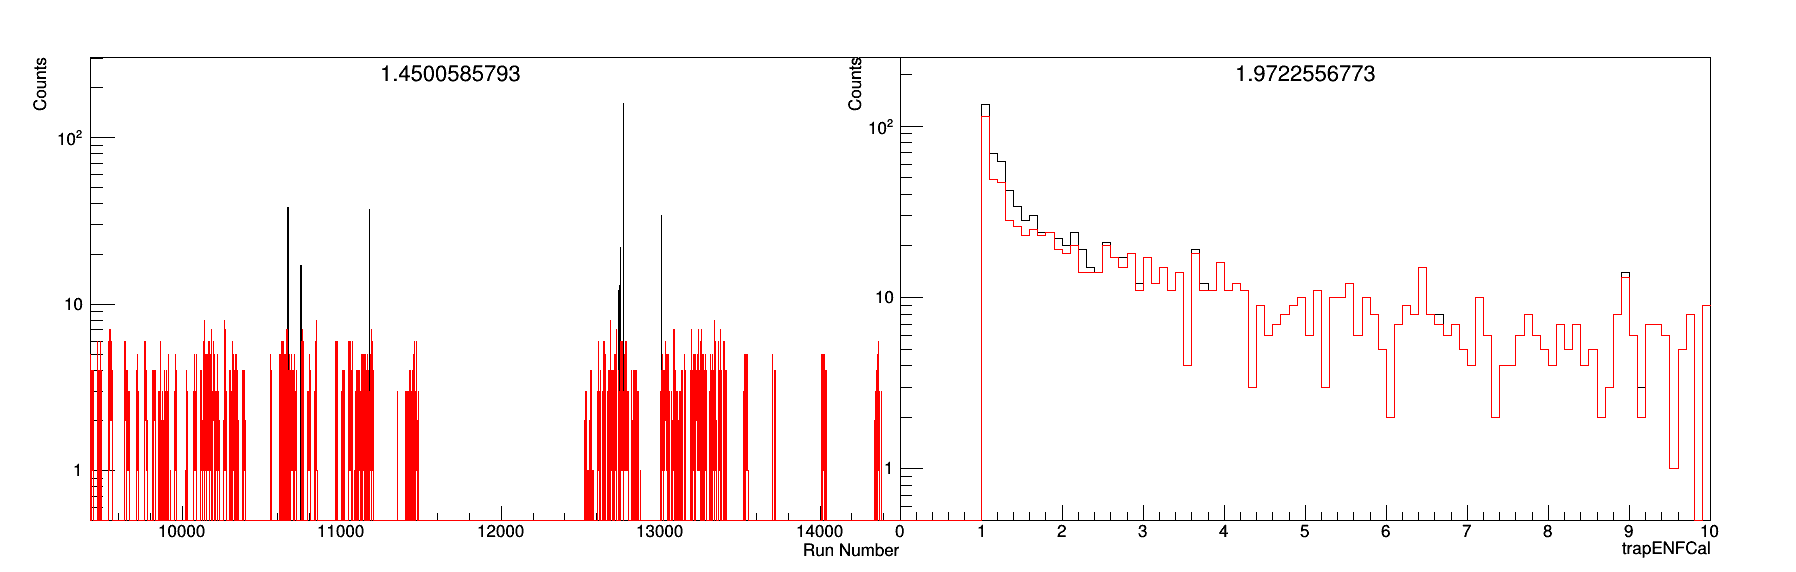

In [27]:
dsNum = 1
ROOT.gStyle.SetOptStat(0)

chList = ds.GetGoodChanList(dsNum)
nChans = len(chList)
avgRate = 50
noiseRate = float(10*(nChans)/avgRate)
print "noiseRate", noiseRate
noiseRate = 0.8

bkg = ROOT.TChain("skimTree")
# bkg.Add("~/project/latskim/latSkimDS%d*.root"%dsNum)
for ch in chList:
#     if ch == 614: continue
    bkg.Add("~/project/latskim/latSkimDS%d_ch%d*.root"%(dsNum, ch))

theCut = "trapENFCal>1&&trapENFCal<100"
# theCut += "&& run!=22428  && run!=22461  && run!=22494"
# theCut += "&& channel!=614 && channel!=1298 && channel!=1124 && channel!=1302 && channel!=1330 && channel!=1332"
# theCut += "&& channel != 1208"
# theCut += "&& channel!=598 && channel!=614 && channel != 1106 && channel != 1124 && channel!=1298  &&channel!=1302  && channel!=1330  && channel!=1332"

print theCut
c = ROOT.TCanvas("c","c",1800,600)
c.Divide(2,1,0)

c.cd(1)
ROOT.gPad.SetLogy(1)
rlo, rhi = ds.dsRanges[dsNum][0], ds.dsRanges[dsNum][1]

h1 = wl.H1D(bkg,rhi-rlo,rlo,rhi,"run",theCut,"Run Number","Counts")
h1.SetLineColor(ROOT.kBlack)
h1.Draw()

runs,rates = wl.npTH1D(h1, "i")
idx = np.where(rates > 10)
print "Noisy Runs and rates:", runs[idx], rates[idx]

c.cd(2)
ROOT.gPad.SetLogy(1)
h4 = wl.H1D(bkg,100,0,10,"trapENFCal",theCut+"&&isEnr","trapENFCal","Counts")
h4.SetLineColor(ROOT.kBlack)
h4.Draw()

badRunDict = {}

hList = []
totalCut = ""
for i, run in enumerate(runs[idx]):
    hList.append(ROOT.TH1D)
    hList[i] = wl.H1D(bkg,785,550,1335,"channel",theCut+"&& run == %d"%run,"channel","Counts")
    chans,rates = wl.npTH1D(hList[i], "i")
    idx2 = np.where(rates > noiseRate)
    print "Run: ", run
    print "Noisy channels:", chans[idx2], rates[idx2]
    ChStr = ""
    NoiseCut = ""
    for ch in chans[idx2]:
        ChStr += "channel==%d||"%ch
    # When combining the channel string, remove the last 2 characters
    NoiseCut += "&&!(run==%d&&(%s))"%(run, ChStr[:-2])
    
#     print NoiseCut
    totalCut += NoiseCut
    
# print totalCut
theCut += totalCut
print theCut

h5 = wl.H1D(bkg,100,0,10,"trapENFCal",theCut+"&&isEnr","trapENFCal","Counts")
h5.SetLineColor(ROOT.kRed)
h5.Draw("same")

c.cd(1)
ROOT.gPad.SetLogy(1)
h7 = wl.H1D(bkg,rhi-rlo,rlo,rhi,"run",theCut,"Run Number","Counts")
h7.SetLineColor(ROOT.kRed)
h7.Draw("same")

# chans,rates = wl.npTH1D(h7, "i")
# idx = np.where(rates > 1000)
# print "Noisy channels:", chans[idx], rates[idx]

c.Draw()